In [3]:
import sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')
data_train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


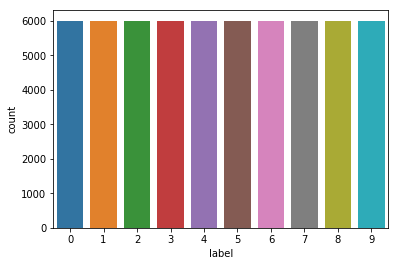

In [5]:
sns.countplot(x = 'label', data=data_train)

In [6]:
dataX = data_train.drop(['label'], axis=1)
dataY = data_train['label']

In [7]:
clf = [SGDClassifier(), ExtraTreeClassifier(), DecisionTreeClassifier(), MLPClassifier()]
clf_gs = []
clf_score_val = []

In [8]:
sgd_grid = {'penalty': ['l1', 'l2'], 'n_jobs': [-1]}
decision_grid = extra_tree_grid = {'splitter': ['best', 'random'], 'max_depth':[10,50,100], 'criterion':['gini', 'entropy']}
mlp_grid = {'hidden_layer_sizes' : [10,50,100], 'activation':['tanh', 'relu']}

clf_grid = [sgd_grid, extra_tree_grid, decision_grid, mlp_grid]

In [9]:
for i in range(len(clf)):
    gs = GridSearchCV(clf[i], clf_grid[i],cv=5, n_jobs=-1, verbose = 10)
    clf_gs.append(gs)

In [10]:
%time
for gs in clf_gs:
    gs.fit(dataX, dataY)

Wall time: 0 ns
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   43.1s remaining:   43.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   47.5s remaining:   20.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   49.6s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   30.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   30.6s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.1min finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 20.4min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 23.7min finished


In [11]:
#import pickle as pkl
#with open('model_gs.pkl', 'wb') as f:
#    pkl.dump(clf_gs, f)

In [12]:
for i in clf_gs:
    print(i.best_score_)

0.8136166666666667
0.7876833333333333
0.8126
0.8558833333333333


In [13]:
#with open('model_gs.pkl', 'rb') as f:
#    model = pkl.load(f)
#for i in model:
#    print(i.best_estimator_.get_params())
#    print('\n')

In [14]:
testX = data_test.drop(['label'], axis=1)
testY = data_test['label']
clf_score = []
for i in clf_gs:
    score = i.best_estimator_.score(testX, testY)
    clf_score.append(score)

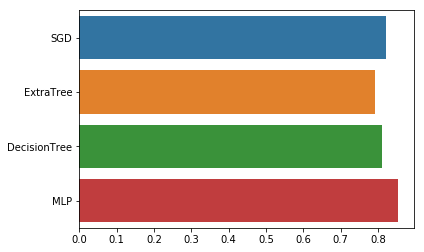

In [15]:
clf_name = ['SGD', 'ExtraTree', 'DecisionTree', 'MLP']
sns.barplot(clf_score, clf_name)

In [16]:
clf_gs[3].best_estimator_.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 100,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [17]:
import pickle as pkl
with open('best_model.pkl', 'wb') as f:
    pkl.dump(clf_gs[3].best_estimator_, f)

In [18]:
for i in clf_gs:
    print(i.best_score_)
    print('\n', i.best_estimator_.get_params())

0.8136166666666667

 {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': None, 'n_iter': None, 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'l1', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': None, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
0.7876833333333333

 {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
0.8126

 {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf